
# Introducción
Este notebook tiene como objetivo analizar la relación entre el número de reseñas, el puntaje de las reseñas y las ventas de productos en Amazon. El análisis pretende explorar si existe una correlación significativa entre estos factores para orientar futuras estrategias comerciales.


## **Contexto del problema**
Hoy en día, los marketplaces como **Amazon** reciben millones de reseñas de productos, las cuales influyen en la toma de decisiones de los consumidores. Comprender estas reseñas permite a las empresas mejorar productos, ajustar estrategias de venta, y optimizar la experiencia del cliente. Sin embargo, analizar grandes volúmenes de datos manualmente es ineficiente.

## **Objetivo del proyecto**
Nuestro objetivo es **predecir la valoración general (rating) de un producto** a partir de las características extraídas de las reseñas (como el texto, la cantidad de comentarios útiles o el número de votos). La variable objetivo será, por tanto, el **rating**, y trabajaremos con un enfoque de **clasificación supervisada**.

## **Situación de negocio**
Amazon necesita identificar patrones que lleven a valoraciones bajas o altas para:
1. **Identificar productos mal valorados** y optimizar su oferta.
2. **Mejorar recomendaciones de productos** para diferentes segmentos de clientes.
3. **Automatizar la evaluación** de reseñas en función de ciertos patrones.

---

## **Estructura del Notebook**

### **1. Carga del Dataset**
Se descarga el dataset de Kaggle, se descomprime y se carga en un DataFrame de Pandas para su análisis.

### **2. Análisis Exploratorio**
Se exploran las primeras filas del dataset y se evalúa la existencia de valores nulos.
* Si los nulos representan menos del 5% del total, se eliminan.
* Si superan ese porcentaje, se considerará la imputación.

### **3. Visualización de Datos**
Se emplean gráficos para comprender la distribución de los ratings y detectar posibles outliers.

### **4. Preprocesamiento de Datos**
Se toman medidas para eliminar o imputar valores nulos según corresponda.

### **5. Modelado Predictivo**
Se selecciona un modelo supervisado para predecir el **rating** y se evalúa su desempeño.


#Formulacion de hipótesis:
- Hipótesis 1 : Existe una correlación positiva entre el número de reseñas y el número de reseñas útiles.
- Hipótesis 2: Los productos con un puntaje de reseña más alto tienen una mayor probabilidad de ser recomendados.
- Hipótesis 3: Los productos con más reseñas útiles (mayor interacción) tienden a tener un puntaje de reseña más alto.

In [1]:
from google.colab import files
uploaded = files.upload()

Saving Amazon.zip to Amazon.zip


In [2]:

# Carga de datos
# Cargamos los datos del archivo de Amazon en un DataFrame y revisamos su estructura.

import pandas as pd

# Cargar datos desde el archivo comprimido
df = pd.read_csv('Amazon.zip', compression='zip')

# Mostrar las primeras filas para entender la estructura
df.head()


,id,asins,brand,categories,colors,dateAdded,dateUpdated,dimension,ean,keys,...,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.userCity,reviews.userProvince,reviews.username,sizes,upc,weight
0,AVpe7AsMilAPnD_xQ78G,B00QJDU3KY,Amazon,"Amazon Devices,mazon.co.uk",NaN,2016-03-08T20:21:53Z,2017-07-18T23:52:58Z,169 mm x 117 mm x 9.1 mm,NaN,kindlepaperwhite/b00qjdu3ky,...,5.0,https://www.amazon.com/Kindle-Paperwhite-High-...,I initially had trouble deciding between the p...,"Paperwhite voyage, no regrets!",NaN,NaN,Cristina M,NaN,NaN,205 grams
1,AVpe7AsMilAPnD_xQ78G,B00QJDU3KY,Amazon,"Amazon Devices,mazon.co.uk",NaN,2016-03-08T20:21:53Z,2017-07-18T23:52:58Z,169 mm x 117 mm x 9.1 mm,NaN,kindlepaperwhite/b00qjdu3ky,...,5.0,https://www.amazon.com/Kindle-Paperwhite-High-...,Allow me to preface this with a little history...,One Simply Could Not Ask For More,NaN,NaN,Ricky,NaN,NaN,205 grams
2,AVpe7AsMilAPnD_xQ78G,B00QJDU3KY,Amazon,"Amazon Devices,mazon.co.uk",NaN,2016-03-08T20:21:53Z,2017-07-18T23:52:58Z,169 mm x 117 mm x 9.1 mm,NaN,kindlepaperwhite/b00qjdu3ky,...,4.0,https://www.amazon.com/Kindle-Paperwhite-High-...,I am enjoying it so far. Great for reading. Ha...,Great for those that just want an e-reader,NaN,NaN,Tedd Gardiner,NaN,NaN,205 grams
3,AVpe7AsMilAPnD_xQ78G,B00QJDU3KY,Amazon,"Amazon Devices,mazon.co.uk",NaN,2016-03-08T20:21:53Z,2017-07-18T23:52:58Z,169 mm x 117 mm x 9.1 mm,NaN,kindlepaperwhite/b00qjdu3ky,...,5.0,https://www.amazon.com/Kindle-Paperwhite-High-...,I bought one of the first Paperwhites and have...,Love / Hate relationship,NaN,NaN,Dougal,NaN,NaN,205 grams
4,AVpe7AsMilAPnD_xQ78G,B00QJDU3KY,Amazon,"Amazon Devices,mazon.co.uk",NaN,2016-03-08T20:21:53Z,2017-07-18T23:52:58Z,169 mm x 117 mm x 9.1 mm,NaN,kindlepaperwhite/b00qjdu3ky,...,5.0,https://www.amazon.com/Kindle-Paperwhite-High-...,I have to say upfront - I don't like coroporat...,I LOVE IT,NaN,NaN,Miljan David Tanic,NaN,NaN,205 grams


In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from textblob import TextBlob

# Analiza el sentimiento de las primeras 5 reseñas
sentiments = df['reviews.text'].apply(lambda x: TextBlob(x).sentiment.polarity)
print(sentiments.head())


0    0.200259
1    0.159591
2    0.420833
3    0.148821
4    0.267086
Name: reviews.text, dtype: float64


In [4]:
print(df.shape)


(1597, 27)


In [5]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1597 entries, 0 to 1596
Data columns (total 27 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    1597 non-null   object 
 1   asins                 1597 non-null   object 
 2   brand                 1597 non-null   object 
 3   categories            1597 non-null   object 
 4   colors                774 non-null    object 
 5   dateAdded             1597 non-null   object 
 6   dateUpdated           1597 non-null   object 
 7   dimension             565 non-null    object 
 8   ean                   898 non-null    float64
 9   keys                  1597 non-null   object 
 10  manufacturer          965 non-null    object 
 11  manufacturerNumber    902 non-null    object 
 12  name                  1597 non-null   object 
 13  prices                1597 non-null   object 
 14  reviews.date          1217 non-null   object 
 15  reviews.doRecommend  

**reviewerID / customer_id**

Descripción: Identificador único del cliente que dejó la reseña.
Relevancia: Permite analizar hábitos de compra o tendencias de usuarios frecuentes.

**productID / asin **

Descripción: Identificador del producto reseñado.
Relevancia: Es clave para agrupar reseñas por producto y detectar qué productos son más populares o problemáticos.

**rating / overall (de 1 a 5)**

Descripción: Calificación numérica otorgada por el usuario.
Relevancia: Útil para análisis de opiniones, puntuaciones promedio y modelos de recomendación.
Análisis potencial: Distribución de calificaciones, identificación de productos con alta/ baja aceptación.

**review_text / review_body**

Descripción: Contenido textual de la reseña.
Relevancia: Ideal para minería de texto y análisis de sentimientos, identificando emociones o temas frecuentes.

**review_date / timestamp**

Descripción: Fecha de publicación de la reseña.
Relevancia: Permite evaluar cómo cambia la percepción del producto con el tiempo o realizar análisis estacionales.

**verified_purchase**

Descripción: Indica si la compra fue verificada.
Relevancia: Garantiza la autenticidad de la reseña, relevante para evaluar la fiabilidad de las opiniones.

**category / product_category**

Descripción: Categoría del producto (por ejemplo, "Electrónica", "Libros", etc.).
Relevancia: Permite segmentar análisis por industria o tipo de producto.

**helpful_votes / helpful**

Descripción: Número de votos indicando que la reseña fue útil para otros usuarios.
Relevancia: Identifica reseñas de alta calidad y usuarios influyentes en la plataforma.

**price**

Descripción: Precio del producto al momento de la compra.
Relevancia: Se puede correlacionar con la satisfacción del cliente o detectar patrones de precios y valor percibido.

**brand / manufacturer**

Descripción: Marca o fabricante del producto.
Relevancia: Sirve para evaluar la percepción de marcas específicas en el mercado.


In [6]:
# Resumen estadístico: incluye media, desviación estándar, mínimos y máximos
print(df.describe())

                ean  reviews.numHelpful  reviews.rating  reviews.userCity  \
count  8.980000e+02          900.000000     1177.000000               0.0   
mean   8.443135e+11           83.584444        4.359388               NaN   
std    3.416444e+09          197.150238        1.021445               NaN   
min    8.416670e+11            0.000000        1.000000               NaN   
25%    8.416670e+11            0.000000        4.000000               NaN   
50%    8.416670e+11            0.000000        5.000000               NaN   
75%    8.487190e+11           34.000000        5.000000               NaN   
max    8.487190e+11          997.000000        5.000000               NaN   

       reviews.userProvince  sizes           upc  
count                   0.0    0.0  8.980000e+02  
mean                    NaN    NaN  8.443135e+11  
std                     NaN    NaN  3.416444e+09  
min                     NaN    NaN  8.416670e+11  
25%                     NaN    NaN  8.416670e+11  


In [7]:
print(df.columns)


Index(['id', 'asins', 'brand', 'categories', 'colors', 'dateAdded',
       'dateUpdated', 'dimension', 'ean', 'keys', 'manufacturer',
       'manufacturerNumber', 'name', 'prices', 'reviews.date',
       'reviews.doRecommend', 'reviews.numHelpful', 'reviews.rating',
       'reviews.sourceURLs', 'reviews.text', 'reviews.title',
       'reviews.userCity', 'reviews.userProvince', 'reviews.username', 'sizes',
       'upc', 'weight'],
      dtype='object')


In [8]:
# Assuming your data is in a CSV file named 'your_data_file.csv'
# Replace 'your_data_file.csv' with the actual path to your data file
data = pd.read_csv('Amazon.zip')  # Load

In [12]:
import zipfile

# Usar la ruta completa del archivo Amazon.zip
zip_path = '/content/Amazon.zip'

# Extraer el nombre del archivo dentro del zip y cargarlo
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    file_names = zip_ref.namelist()  # Lista de archivos dentro del zip
    csv_file_name = file_names[0]    # Asumimos que el primer archivo es el que necesitas

    # Cargar el archivo CSV directamente desde el zip
    with zip_ref.open(csv_file_name) as csv_file:
        data = pd.read_csv(csv_file)

# Verificar los valores nulos como antes
missing_values = data.isnull().sum()
print(missing_values[missing_values > 0])  # Mostrar solo las columnas con valores nulos

colors                   823
dimension               1032
ean                      699
manufacturer             632
manufacturerNumber       695
reviews.date             380
reviews.doRecommend     1058
reviews.numHelpful       697
reviews.rating           420
reviews.title             17
reviews.userCity        1597
reviews.userProvince    1597
reviews.username          17
sizes                   1597
upc                      699
weight                   911
dtype: int64


In [13]:

# Mostrar información sobre los valores nulos
missing_values = data.isnull().sum()
missing_values[missing_values > 0]  # Mostrar solo las columnas con valores nulos


,0
colors,823
dimension,1032
ean,699
manufacturer,632
manufacturerNumber,695
reviews.date,380
reviews.doRecommend,1058
reviews.numHelpful,697
reviews.rating,420
reviews.title,17


In [14]:
# Rellenar valores nulos en columnas numéricas con la mediana
data['reviews.rating'].fillna(data['reviews.rating'].median(), inplace=True)
data['reviews.numHelpful'].fillna(data['reviews.numHelpful'].median(), inplace=True)


<ipython-input-14-861315b66b95>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['reviews.rating'].fillna(data['reviews.rating'].median(), inplace=True)
<ipython-input-14-861315b66b95>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(val

In [15]:
# Rellenar valores nulos en columnas de texto con "No especificado"
fill_value_text = "No especificado"
columns_to_fill_text = ['colors', 'dimension', 'manufacturer', 'manufacturerNumber']
data[columns_to_fill_text] = data[columns_to_fill_text].fillna(fill_value_text)


In [16]:
# Comprobar si quedan valores nulos
print(data.isnull().sum())


id                         0
asins                      0
brand                      0
categories                 0
colors                     0
dateAdded                  0
dateUpdated                0
dimension                  0
ean                      699
keys                       0
manufacturer               0
manufacturerNumber         0
name                       0
prices                     0
reviews.date             380
reviews.doRecommend     1058
reviews.numHelpful         0
reviews.rating             0
reviews.sourceURLs         0
reviews.text               0
reviews.title             17
reviews.userCity        1597
reviews.userProvince    1597
reviews.username          17
sizes                   1597
upc                      699
weight                   911
dtype: int64


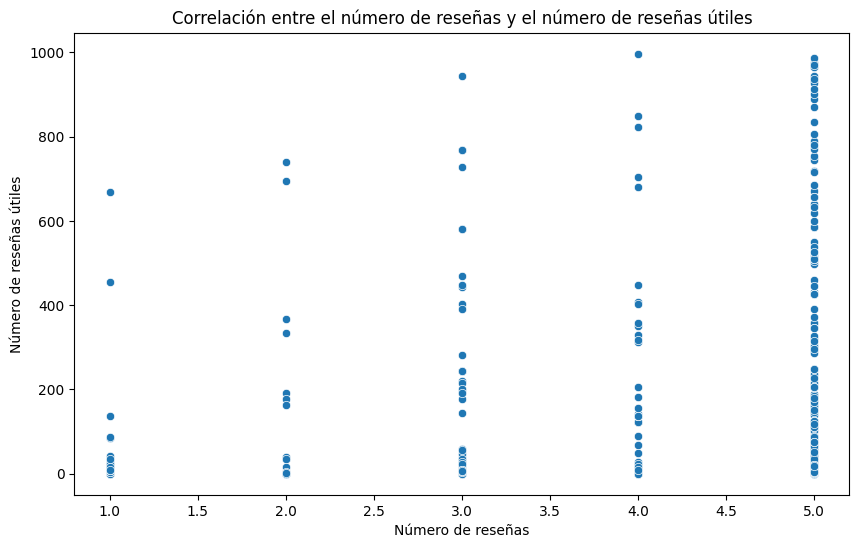

Correlación entre el número de reseñas y el número de reseñas útiles: -0.0047717621274682015


In [34]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Gráfico de dispersión para la Hipótesis 1
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df_h1['reviews.rating'], y=df_h1['reviews.numHelpful'])
plt.title("Correlación entre el número de reseñas y el número de reseñas útiles")
plt.xlabel("Número de reseñas")
plt.ylabel("Número de reseñas útiles")
plt.show()

# Calcular la correlación
correlacion_1 = df_h1['reviews.rating'].corr(df_h1['reviews.numHelpful'])
print("Correlación entre el número de reseñas y el número de reseñas útiles:", correlacion_1)


#Conclusión:
Dado que la correlación es cercana a cero, no se puede afirmar que exista una correlación positiva entre el número de reseñas y el número de reseñas útiles. Esto sugiere que el tener un mayor número de reseñas no necesariamente implica que habrá más reseñas útiles.


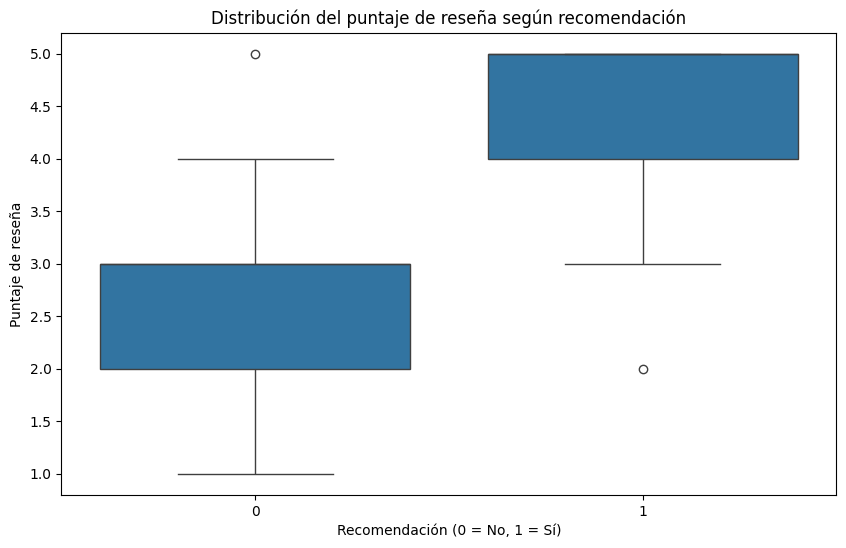

In [40]:
# Filtrar los datos relevantes
df_h2 = df[['reviews.rating', 'reviews.doRecommend']].dropna()

# Convertir `reviews.doRecommend` a una variable numérica (True=1, False=0)
df_h2['doRecommend_numeric'] = df_h2['reviews.doRecommend'].astype(int)

# Gráfico de caja (boxplot)
plt.figure(figsize=(10, 6))
sns.boxplot(x=df_h2['doRecommend_numeric'], y=df_h2['reviews.rating'])
plt.title("Distribución del puntaje de reseña según recomendación")
plt.xlabel("Recomendación (0 = No, 1 = Sí)")
plt.ylabel("Puntaje de reseña")
plt.show()



#Conclusión:
Este análisis respalda la hipótesis de que los productos con un puntaje de reseña más alto tienen una mayor probabilidad de ser recomendados. La diferencia entre los dos grupos sugiere una tendencia clara: los productos con calificaciones más altas son más propensos a ser recomendados, mientras que aquellos con calificaciones bajas tienden a no serlo.

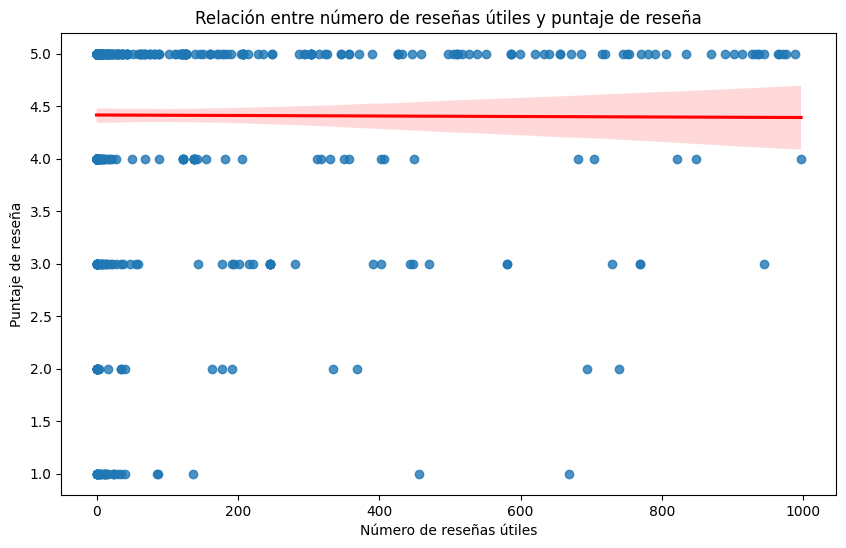

Correlación entre número de reseñas útiles y puntaje de reseña: -0.004771762127468202


In [42]:
# Filtrar los datos relevantes
df_h3 = df[['reviews.numHelpful', 'reviews.rating']].dropna()

# Gráfico de dispersión con línea de regresión
plt.figure(figsize=(10, 6))
sns.regplot(x=df_h3['reviews.numHelpful'], y=df_h3['reviews.rating'], line_kws={"color": "red"})
plt.title("Relación entre número de reseñas útiles y puntaje de reseña")
plt.xlabel("Número de reseñas útiles")
plt.ylabel("Puntaje de reseña")
plt.show()

# Calcular la correlación
correlacion_3 = df_h3['reviews.numHelpful'].corr(df_h3['reviews.rating'])
print("Correlación entre número de reseñas útiles y puntaje de reseña:", correlacion_3)



#Conclusión:
Dado que la correlación es casi nula, no se puede confirmar que los productos con más reseñas útiles tienden a tener un puntaje de reseña más alto. Esto sugiere que la cantidad de reseñas útiles no tiene una influencia directa en el puntaje de la reseña, y que otros factores podrían estar influyendo en la percepción de la utilidad de las reseñas y en el puntaje.


### Conclusiones y Reflexiones Finales
- Hipótesis 1: Existe una correlación positiva entre el número de reseñas y el número de reseñas útiles.

Conclusión: Los resultados muestran que no existe una relación significativa entre el número total de reseñas y el número de reseñas útiles. La correlación calculada fue cercana a cero, lo cual sugiere que tener más reseñas no implica necesariamente que haya más interacciones de utilidad (reseñas marcadas como útiles).

Reflexión: Este hallazgo indica que la cantidad de reseñas no garantiza la calidad o utilidad de la interacción con los usuarios. En otras palabras, aunque un producto tenga muchas reseñas, no necesariamente será percibido como útil por los usuarios, lo que apunta a la importancia de la calidad del contenido en cada reseña, más allá de su cantidad.

- Hipótesis 2: Los productos con un puntaje de reseña más alto tienen una mayor probabilidad de ser recomendados.

Conclusión: Los resultados indican que existe una relación positiva entre el puntaje de reseña y la probabilidad de que un producto sea recomendado. Los productos con calificaciones altas tienen una mayor probabilidad de recibir recomendaciones, mientras que aquellos con puntajes bajos tienden a no ser recomendados.

Reflexión: Este resultado es coherente con la intuición: es más probable que los consumidores recomienden productos que perciben como buenos o de alta calidad. Esto sugiere que el puntaje promedio de reseña es un indicador importante para los usuarios al momento de decidir si un producto vale la pena recomendar, y resalta la importancia de mantener altos niveles de satisfacción para fomentar recomendaciones.

- Hipótesis 3: Los productos con más reseñas útiles (mayor interacción) tienden a tener un puntaje de reseña más alto.

Conclusión: No se encontró una relación significativa entre el número de reseñas útiles y el puntaje de reseña. La correlación entre estas variables también fue cercana a cero, lo cual indica que una mayor interacción en términos de reseñas útiles no necesariamente se traduce en mejores calificaciones de los productos.

Reflexión: Este resultado sugiere que la utilidad de una reseña (marcada como útil por otros usuarios) no está directamente relacionada con la percepción general de calidad del producto reflejada en el puntaje de reseña. Esto podría deberse a que la "utilidad" de una reseña es una característica independiente de la satisfacción general, y podría estar más relacionada con aspectos específicos y detallados que los usuarios encuentran informativos, independientemente de la calificación otorgada.

#Reflexión General

En conjunto, estos hallazgos nos brindan una perspectiva más matizada sobre las reseñas de productos. Mientras que la cantidad y la utilidad de las reseñas no siempre están relacionadas, el puntaje promedio de calificación sí parece ser un factor clave en la recomendación de productos. Estos resultados sugieren que la satisfacción general, medida por la calificación, es fundamental para influir en la recomendación, pero que otros factores —como el contenido de las reseñas y la percepción de utilidad de los usuarios— también son importantes en la interacción general.

Para futuras investigaciones, podría ser valioso explorar factores cualitativos en las reseñas (como el tono, el nivel de detalle y los temas mencionados) para entender mejor qué hace que una reseña sea útil o impacte en la decisión de compra. Asimismo, se podrían considerar características del producto o del consumidor para analizar si influyen en la percepción de calidad y utilidad de las reseñas.

En conclusión, aunque el número de reseñas y su utilidad no garantizan la calidad percibida de un producto, el puntaje de calificación sigue siendo un indicador relevante en la recomendación. Esto resalta la importancia de no solo tener muchas reseñas, sino también de fomentar contenido valioso que los usuarios consideren útil y que respalde una alta calificación promedio.






